# Homework set 5

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 4, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Zijian Zhang, 14851598

Lina Xiang, 14764369

# Exercise 1 (6 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [1]:
import numpy as np

data = np.array([0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14])

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$. Implement the Gauss-Newton method yourself. You may use linear algebra functions from `scipy` and `numpy`. Plot the datapoints and the curve fitted to the data in a semilogarithmic plot.

It is best if you define your function for Gauss-Newton separately from the definitions associated with the bacterial model.

In [2]:
# define Gauss-Newton here
from scipy.optimize import approx_fprime


def gauss_newton(f, y, x0, max_iter=10000):
    x = x0
    epsilon = np.sqrt(np.finfo(float).eps)
    for _ in range(max_iter):
        # r = y - f, y is constant, so Jr = -Jf
        Jr = -approx_fprime(x, f, epsilon)
        neg_r = f(x) - y
        s, *_ = np.linalg.lstsq(Jr, neg_r, rcond=None)
        if np.linalg.norm(s) == 0:
            break
        x += s
    return x

Estimated P_0 = 0.16163834530349144
Estimated r = 1.7494028860622526


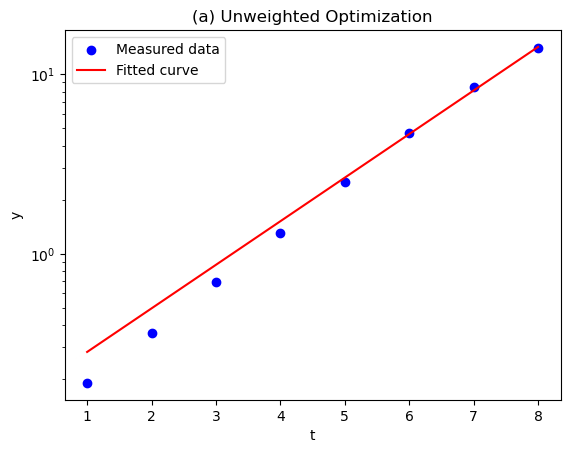

In [3]:
# make definitions for bacterial model and run Gauss-Newton here
import matplotlib.pyplot as plt


def make_bacterial_model(t):

    def bacterial_model(x):
        return x[0] * x[1]**t

    return bacterial_model


t = np.arange(1, len(data)+1)
f = make_bacterial_model(t)
x0 = np.array([1., 1.])
x_a = gauss_newton(f, data, x0, max_iter=1000)
print(f'Estimated P_0 = {x_a[0]}')
print(f'Estimated r = {x_a[1]}')

plt.figure()
plt.title('(a) Unweighted Optimization')
plt.scatter(t, data, label='Measured data', c='b')
plt.semilogy(t, f(x_a), label='Fitted curve', c='r')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()

# (b)
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( y_i - f_i(x)) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| Y - F(x) \|_2^2
$$
with $F_i(x) = \frac{1}{\sigma_i} f(x)$  , $Y_i = \frac{1}{\sigma_i} y_i$. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0$ and $r$. 

Plot the datapoints and the curve fitted to the data again in a semilogarithmic plot.

Compare the residuals, i.e. the values of $y_i - f_i(x)$) obtained in (a) and (b), and discuss the differences between the results of the weighted and the unweighted optimization.


Estimated P_0 = 2.3063161082579453e-15
Estimated r = 94.15518779507937


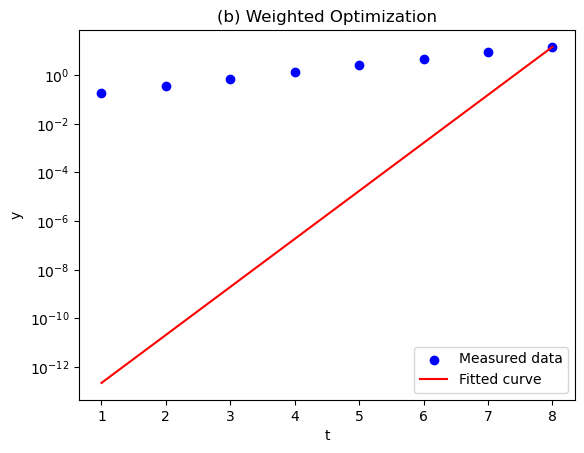

In [4]:
# your code here
def make_F(t, sigma):

    def F(x):
        return x[0] * x[1]**t / sigma

    return F


t = np.arange(1, 9)
sigma = 0.05 * data
Y = data / sigma
F = make_F(t, sigma)
x0 = np.array([1., 1.])
x_b = gauss_newton(F, Y, x0, max_iter=1000)
print(f'Estimated P_0 = {x_b[0]}')
print(f'Estimated r = {x_b[1]}')

plt.figure()
plt.title('(b) Weighted Optimization')
plt.scatter(t, data, label='Measured data', c='b')
plt.semilogy(t, f(x_b), label='Fitted curve', c='r')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()

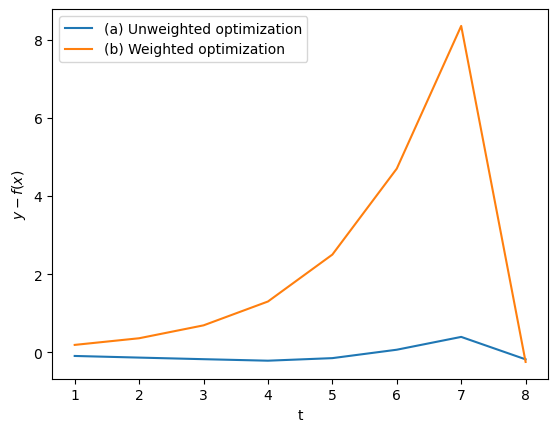

In [5]:
# Compare the residuals
plt.figure()
plt.plot(t, data-f(x_a), label='(a) Unweighted optimization')
plt.plot(t, data-f(x_b), label='(b) Weighted optimization')
plt.legend()
plt.xlabel('t')
plt.ylabel(r'$y-f(x)$')
plt.show()

#### **Answer:**
The results of unweighted optimization have better residuals than the weighted one. This may be because the estimate for the standard deviation $\sigma_i = 0.05y_i$ is not very accurate.

# Exercise 2 (3 points)
A triangle has been measured. The measurements, a vector $x \in \mathbb{R}^6$, are as follows:
$$\begin{array}{c|c|c|c|c|c}
x_1 = \alpha 
& x_2 = \beta
& x_3 = \gamma
& x_4 = a
& x_5 = b
& x_6 = c \\ \hline
67.5^{\large\circ}
& 52^{\large\circ}
& 60^{\large\circ}
& 172 \text{m}
& 146 \text{m}
& 165 \text{m}
\end{array} .
$$
Here $\alpha, \beta, \gamma$ are the angles opposite the sides with length $a$, $b$, $c$, respectively.
The measurements $x$ have errors. We would like to correct them so that the new values $\tilde{x} = x + h$ are consistent quantities of a triangle. The have to satisfy:
$$ \tag{*}
\begin{array}{ccc}
\text{Sum of angles:} 
& \;\;\;\;\; & 
\tilde{x}_1 + \tilde{x}_2 + \tilde{x}_3 = 180^{\large\circ}
\\
\text{Sine theorem:}
&&
\tilde{x}_4 \sin(\tilde{x}_2) - \tilde{x}_5 \sin(\tilde{x}_1) = 0
\\
&&
\tilde{x}_5 \sin(\tilde{x}_3) - \tilde{x}_6 \sin(\tilde{x}_2) = 0 .
\end{array}$$


## (a)
Solve the constrained least squares problem $\min_x \| h \|_2^2$ subject to the constraints given by (*).

Use `scipy.optimize.minimize`.

Hint: Don't forget to work in radians!

Check that for the new values also e.g. the cosine theorem $c^2 = a^2 + b^2 - 2 ab \cos(\gamma)$ holds.

In [6]:
from scipy.optimize import minimize


pi = np.pi
x = np.array([67.5, 52, 60, 172, 146, 165])
x[:3] = np.radians(x[:3])
objective_function = lambda h: np.linalg.norm(h)**2
h0 = np.zeros(len(x))
constraints = [{
    'type': 'eq',
    'fun': lambda h: np.sum(x[:3]) + h[0] + h[1] + h[2] - pi
}, {
    'type': 'eq',
    'fun': lambda h: (x[3]+h[3]) * np.sin(x[1]+h[1]) - (x[4]+h[4]) * np.sin(x[0]+h[0])
}, {
    'type': 'eq',
    'fun': lambda h: (x[4]+h[4]) * np.sin(x[2]+h[2]) - (x[5]+h[5]) * np.sin(x[1]+h[1])
}]
result = minimize(objective_function, h0, constraints=constraints)
h = result.x
x_tilde = x + h
print(f'x = {x}')
print(f'h = {h}')
print(f'x_tilde = {x_tilde}')

# Check the new values
[gamma, a, b, c] = x_tilde[2:]
c2 = c**2
cosine_theorem = a**2 + b**2 - 2*a*b*np.cos(gamma)
print(f'The cosine theorem holds for the new results: {np.isclose(c2, cosine_theorem)}.')

x = [  1.17809725   0.90757121   1.04719755 172.         146.
 165.        ]
h = [-0.01169255 -0.01231171  0.0327309   0.0002013   0.00012197 -0.00032557]
x_tilde = [  1.16640469   0.89525951   1.07992846 172.0002013  146.00012197
 164.99967443]
The cosine theorem holds for the new results: True.


## (b)
You will notice that the corrections will be made mainly to the angles and much less to the lengths of the sides of the triangle. This is because the measurements have not the same absolute errors. While the error in last digit of the sides is about 1, the errors in radians of the angles are about 0.01. Repeat your computation by taking in account with appropriate weighting the difference in measurement errors. Minimize not simply $\| h \|_2^2$ but
$$
  \left\| \begin{bmatrix} 100 h_1 \\ 100 h_2 \\ 100 h_3 \\ h_4 \\ h_5 \\ h_6 \end{bmatrix} \right\|_2^2.$$

In [7]:
def new_obj_fun(h):
    weighted_h = h
    weighted_h[:3] *= 100
    return np.linalg.norm(weighted_h)**2


result = minimize(new_obj_fun, h0, constraints=constraints)
h = result.x
x_tilde = x + h
print(f'x = {x}')
print(f'h = {h}')
print(f'x_tilde = {x_tilde}')

# Check the new values
[gamma, a, b, c] = x_tilde[2:]
c2 = c**2
cosine_theorem = a**2 + b**2 - 2*a*b*np.cos(gamma)
print(f'The cosine theorem holds for the new results: {np.isclose(c2, cosine_theorem)}.')

x = [  1.17809725   0.90757121   1.04719755 172.         146.
 165.        ]
h = [-0.00194679 -0.00574569  0.01641912  0.71863111  0.77294983 -1.45208511]
x_tilde = [  1.17615045   0.90182552   1.06361667 172.71863111 146.77294983
 163.54791489]
The cosine theorem holds for the new results: True.
